In [1]:
import numpy as np
import matplotlib.pylab as plt

n=2
fs = 'xx-large'

In [3]:
f = open("/home/matti/Desktop/2alla-n.txt","w")
for i in range(40,-40,-1):
    f.write("2^(%3d) =  %10.50f\n"%(i,2**i))
f.close()

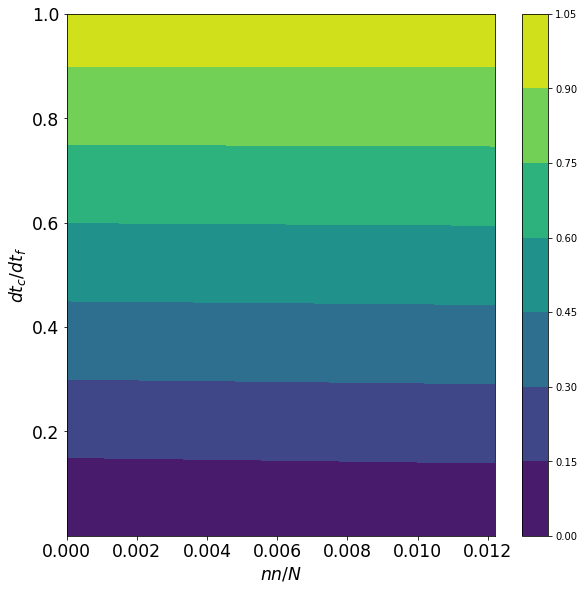

In [8]:
def gain(x,y): return x + y*(1-x)

x = np.linspace(0,25/2048, 26) # minimi vicini 0, massimi 25. (su 2048, senno' usa formulazza)
y = np.linspace(1,2**(-32), 35) # massimo rapporto con dtc=dtf (1), minimo se dtf=2^-3 e dtc=2^-35 (2^-32) 
x,y = np.meshgrid(x,y)
z = gain(x,y)

_ = plt.figure(0, figsize=[n*4.8,n*4.8])
_ = plt.contourf(x,y, z)
_ = plt.xlabel(r'$nn/N$', fontsize=fs)
_ = plt.ylabel(r'$dt_c/dt_f$', fontsize=fs)
_ = plt.xticks(fontsize=fs)
_ = plt.yticks(fontsize=fs)
_ = plt.colorbar()

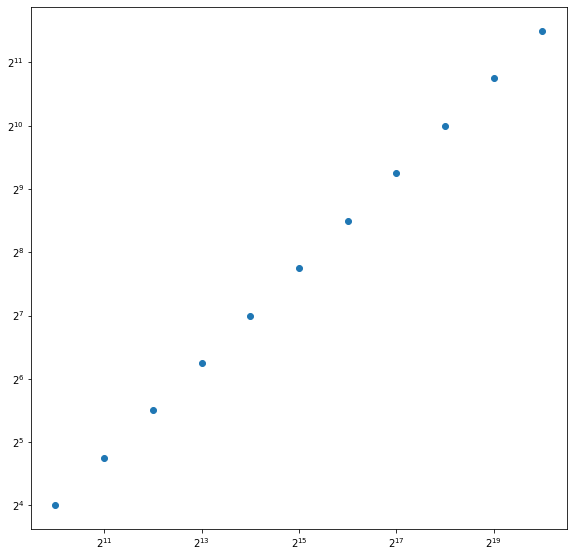

In [28]:
def max_neighs(N): return 0.25*(0.25*N)**0.75
N = [2**i for i in range(10,21)]
N = np.array(N)

fig = plt.figure(0, figsize=[n*4.8,n*4.8])
ax = plt.gca()
_ = ax.scatter(N, max_neighs(N))
ax.set_yscale('log', base=2)
ax.set_xscale('log', base=2)

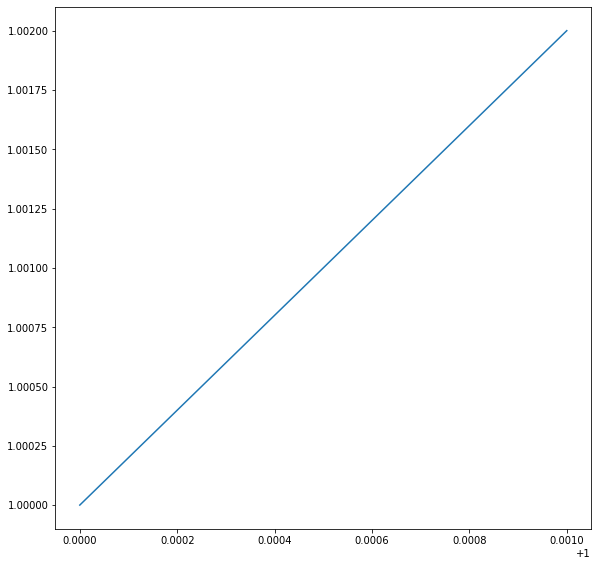

In [11]:
n=2
x  = np.linspace(1,1.001,1001)
y  = x**2

fig = plt.figure(figsize=[n*4.8,n*4.8])
_=plt.plot(x,y)